# 模型评价

作者：杨岱川

时间：2019年9月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

## 内容回顾

在上一次课程我们学习了：

- numpy、pandas以及matplotlib的常见方法

- 损失函数：损失函数（loss function）或者代价函数（cost function）来度量预测错误的程度。

- 模型的训练误差和测试误差

- 模型的过拟合

- 正则化

- 交叉验证

以及相关代码的实现

## 补充：监督学习模型评价标准

对于监督学习，我们在模型完成训练后，如何评价模型的训练效果？

打个比方：

1.损失函数下降类似于学生的学习和练习效果，学生使用某种学习方法，比如题海战术，（这就是**算法**的选择）尽到最大努力学习了，整体的做题错误率在不断降低（**loss**在降低），学生的知识水平在不断提高。

2.但是对于期末考试，看的是本次考试的表现（test），而不是平时学生的表现（train）。比如某次考试有一百道判断题，每题一分，学生做对了80道题，得分80分。

3.学生平时做题表现很好，错得很少。但是考试时候拿到试卷，发现试卷上的题目都是平时没有学过的知识点，或者超纲题目，这叫**数据分布不均匀**，或者叫train set和test set不是**同分布**的。

4.如果考试的时候发现，怎么遇到之前练习的原题了？原题相当于送分题，放在机器学习方法中就叫数据集不是**独立**的。我们在机器学习中要求，训练集和测试集最好是独立同分布的，就是这个意思。

而今天我们来讲讲模型的评价标准，也就是“老师的打分方式”。

### 准确率、精准率、召回率与 $F_1$ 值

- 模型的评价指标一般是分类**准确率**，其定义是：对于给定的测试数据集，分类器正确分类的样本数与总样本数之比。

> 借用上面的例子，如某次考试有一百道判断题，每题做对得一分，做错得零分，学生做对了80道题，得分80分，学生的正确率就是80%。

- 对于二分类问题，常用的评价指标是精确率（precision）和召回率（recall）。以关注的类为正类（positive），其他类为负类（negative），分类器在测试数据集上的预测或正确或者不正确，4种情况出现的总数分别记做：

> TP —— True Positive，将正类预测为正类数
>
> FN —— False Negative，将正类预测为负类数
>
> FP —— False Positive，将负类预测为正类数
>
> TN —— True Negative，将负类预测为负类数

- 精确率又叫查准率，定义为$$ P = \frac{\rm TP}{\rm TP + \rm FP} $$

- 召回率又叫查全率，定义为$$ R = \frac{\rm TP}{\rm TP + \rm FN} $$

- 此外还有 $ F_1 $ 值，是精确率和召回率的调和平均值，即$$ \frac{2}{F_1} = \frac{1}{P}+ \frac{1}{R} $$

查准率和查全率可以类比医院看病。比如有一种罕见病，据统计全球发病率为百万分之三，医院要开发一种机器学习诊断系统去为广大患者诊断这种病。

预计有一千万人使用该系统，如果：

- 我用准确率（越高越好）作为这个诊断系统的评价指标，会怎么样？

> Hint：全部判断为健康人

- 我用精确率（越高越好）作为这个诊断系统的评价指标，会怎么样？

> Hint：病入膏肓再下诊断

- 我用召回率（越高越好）作为这个诊断系统的评价指标，会怎么样？

> Hint：全部判断为病人

- 我用 $ F_1 $ 值（越高越好）作为这个诊断系统的评价指标，会怎么样？

> 结合了精确率和召回率的优点（希望既不漏诊也不误诊）。

### 代码实现

在 SKlearn 包中，我们也有上述指标的函数实现.

#### 数据集

先导入相关包，建立一个仿真的数据集。假设数字1表示正样本（positive，例如：患病阳性），如下：

In [1]:
from sklearn import metrics

y_pred = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
y_true = [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

#### 准确率（accuracy）

文档：[sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

```Python
sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
```

In [2]:
accuracy = metrics.accuracy_score(y_true, y_pred)
print(accuracy)

0.7


#### 精确度（precision）

文档：[sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

```Python
sklearn.metrics.precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
```

In [3]:
precision = metrics.precision_score(y_true, y_pred)
print(precision)

0.5


#### 召回率（recall）

文档：[sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

```Python
sklearn.metrics.recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
```

In [4]:
recall = metrics.recall_score(y_true, y_pred)
print(recall)

0.3333333333333333


#### $F_1$值

文档：[sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

```Python
sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
```

In [5]:
f1 = metrics.f1_score(y_true, y_pred)
print(f1)

0.4


### 其他常用指标 - ROC 与 AUC

很多情况下，我们的模型的对测试样本的输出是一个概率预测。比如神经网络对每个测试样本预测出一个0到1之间的实数，然后将这个值与阈值0.5比较，大于0.5就输出1，反之则输出0。

我们将每个测试对象做一次排序，最可能是正例（阳性）的排在最前面，最可能是反例（阴性）的则排在最后。在这种情况下，如果我们更重视精确率（查准率），则可以把阈值提高；如果我们更重视召回率（查全率），则可以降低阈值。因此，这个排序的质量好坏，体现了模型在不同任务下的“期望泛化能力”，即应对不同任务要求侧重点的能力，或者说是“一般情况下”泛化性能的好坏。

ROC（Receiver Operating Characteristic）曲线就是从这个角度出发来研究模型泛化能力的好方法。


#### ROC原理

我们根据模型的预测结果对样例排序，按此顺序逐个把样本作为正例预测（相当于把阈值从0逐步提高到1），计算出其真阳性率（True Positive Rate）作为纵坐标值，假阳性率（False Positive Rate）作为横坐标值。

#### ROC代码实现

文档：[sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
```Python
sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
```

首先我们先准备一些模拟数据：

In [12]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y = np.array([1, 1, 2, 2, 1, 1, 1, 1, 2, 1])  # 真实标签，其中1是阳性
scores = np.array([0.77, 0.2, 0.44, 0.8, 0.4, 0.09, 0.67, 0.5, 0.68, 0.57])  # 预测概率

我们开始绘制ROC曲线，计算真阳性率和假阳性率，使用 roc_curve() 方法：

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2, drop_intermediate=False)  
# 这里drop_intermediate=True和drop_intermediate=False对图形没有影响，主要是为了全面展示
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.14285714 0.14285714 0.28571429 0.42857143
 0.57142857 0.57142857 0.71428571 0.85714286 1.        ]
[0.         0.33333333 0.33333333 0.66666667 0.66666667 0.66666667
 0.66666667 1.         1.         1.         1.        ]
[1.8  0.8  0.77 0.68 0.67 0.57 0.5  0.44 0.4  0.2  0.09]


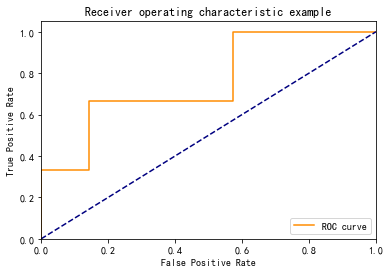

In [14]:
plt.figure()

plt.plot(fpr, tpr, color='darkorange', label='ROC curve')  # ROC曲线
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # AUC = 0.5参考线
plt.xlim([0.0, 1.0])  # X轴
plt.ylim([0.0, 1.05])  # Y轴
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 感知机

感知机（perceptron）是二分类的线性分类器，其输入为实例的特征向量，输出为实例的类别，取 $ +1 $ 和 $ -1 $ 二值。 感知机在1957年由 Rosenblatt 提出，是神经网络与支持向量机的基础。

<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1568201664553&di=89be213c3f95c9113f5970de0ec54d6e&imgtype=0&src=http%3A%2F%2Fwww.wenxuge.com%2Fuploads%2Fallimg%2F170121%2F135A94W0-1.jpg" width="300" alt="年轻时候的Rosenblatt" align=center>
<center>年轻时候的Rosenblatt</center>

## 感知机原理

由输入空间到输出空间，感知机函数如下：

$$\large f(x) = \operatorname{sign}(w\cdot x+b) $$

其中，$w$ 和 $b$ 是感知机的模型参数，$w$ 叫做权值（weight）或者权值向量（weight vector），$b$ 叫做偏置（bias）。

$$\large \operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right. $$

感知机的学习，有给定训练数据集 $T$（实例的特征向量及类别）：

$$\large T = \{(x_1, y_1),(x_2, y_2),\ldots, (x_N, y_N) \} $$

其中：

$ x\in \mathbb X $，表示实例的特征向量。 $ \mathbb X \subseteq \operatorname{R}^n $，表示感知机的输入空间（特征空间）。

$ y_i\in \mathbb Y= \{+1, -1\},i=1,2,\ldots,N $ ，表示输出空间。

概念比较抽象的话，可以用我们熟悉的 iris 数据集类比。

代码实现如下：

In [15]:
import pandas as pd
pd.set_option('display.max_rows', 200)

iris = pd.read_csv("Iris.csv")  # 读取文件
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"]
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"]
sample_iris = iris_setosa.append(iris_versicolor)  # 组合两个dataframe
sample_iris.reset_index(drop=True, inplace=True)  # 重置索引
sample_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


将标签 Species 中的 Iris-setosa 设为 $+1$，将 Iris-versicolora 设为 $-1$。

代码实现如下：

In [16]:
# 不建议用被注释掉的方法
# sample_iris["Species"][sample_iris["Species"] == 'Iris-setosa'] = 1
# sample_iris["Species"][sample_iris["Species"] == 'Iris-versicolor'] = -1
sample_iris["Species"] = sample_iris["Species"].replace("Iris-setosa", 1)
sample_iris["Species"] = sample_iris["Species"].replace("Iris-versicolor", -1)
sample_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [17]:
sample_iris_check = sample_iris[sample_iris['SepalLengthCm'] == 4.5]
sample_iris_check

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,42,4.5,2.3,1.3,0.3,1


上述 iris 数据集的子集，如果不算 id 列，那么就是一个四维的特征空间。每一朵花瓣的长宽和花萼的长宽就是这朵花（实例）的特征向量。

## 感知机的学习策略

线性方程 $$\large w\cdot x+b = 0 $$ 

对应特征空间 $ \operatorname{R}^n $ 中的一个超平面 $ S $，其中 $w$ 是超平面 $S$ 的法向量，$b$ 是超平面的截距，注意这里 $w$ 和 $x$ 都是 $n$ 维的。

> - 超平面（Hyperplane）是指 $n$ 维线性空间中维度为 $n-1$ 的子空间，其中 $n > 3$ 。它可以把线性空间分割成不相交的两部分。类比二维空间中，一条直线是一维的，它把平面分成了两块；三维空间中，一个平面是二维的，它把空间分成了两块。
>
>
> - 超平面线性方程也可以被描述为： $\large a_{1}x_{1}+a_{2}x_{2}+\cdots +a_{n}x_{n}=b $
>
>
> - 法向量是指垂直于超平面的向量。
>
>
> - 扩展阅读：[Hyperplane](https://en.wikipedia.org/wiki/Hyperplane)

<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1568221822800&di=ed9b3da4b5bec75473830cd518cdbb50&imgtype=0&src=http%3A%2F%2Fpic2.zhimg.com%2Fv2-9bada2487998a9a06e1bc7dc83bf3b7e_1200x500.jpg" width="300" alt="感知机" align=center>



假设数据集线性可分，感知机的目标就是找到特征空间 $ \operatorname{R}^n $ 中的一个超平面 $ S $，满足

$$\large w\cdot x+b = 0 $$ 

并且能够将数据集的正实例点和负实例点完全正确地划分到超平面的两侧。

利用刚刚的鸢尾花数据集，将数据降维可视化。

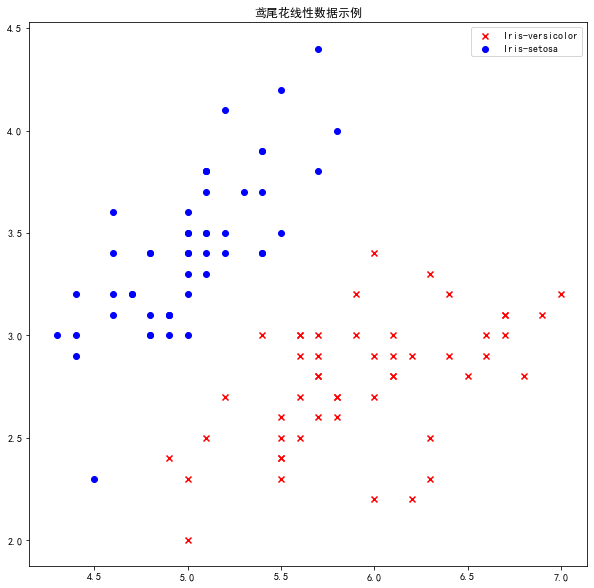

In [18]:
import matplotlib.pyplot as plt

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

# 数据散点图
plt.scatter(iris_versicolor['SepalLengthCm'], iris_versicolor['SepalWidthCm'], c='r', label='Iris-versicolor', marker='x')
plt.scatter(iris_setosa['SepalLengthCm'], iris_setosa['SepalWidthCm'], c='b', label='Iris-setosa',)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.show()  # 显示图片

### 感知机的损失函数

几何意义：误分类点到超平面 $ S $的总距离。其损失函数，也是其关于训练集的经验风险函数为：

$$\large L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$$

感知机的策略就是在假设空间中寻找让上述损失函数最小的模型参数 $w$ 和 $b$，即感知机模型。

### 感知机的算法步骤

感知机算法是误分类驱动的，具体采用随机梯度下降法（Stochastic Gradient Descent）。假设误分类点的集合 $M$ 是固定的，损失函数 $ L(w,b)$ 的梯度由

$$\large \nabla_wL(w,b) = -\sum_{x_i\in M}y_ix_i $$
$$\large \nabla_bL(w,b) = -\sum_{x_i\in M}y_i  $$

给出。

> 即损失函数 $L(w, b)$ 求偏导数。

随机选择一个误分类点 $(x_i,y_i)$ 对 $w,b$ 更新：

$$\large w\leftarrow w+\eta y_ix_i $$
$$\large b\leftarrow b+\eta y_i $$

其中 $\eta$ 指的是学习率（learning rate）。这样不停地迭代计算、更新，损失函数 $ L(w,b)$ 就会不断减小，直到为0。

> 直观地理解：当一个实例点$(x_i,y_i)$被误分类时，即位于分离超平面 $ S $ 错误一侧时，调整 $w$ 和 $b$ 的值，使分离超平面向该误分类点的一侧移动，以减少该误分类点与超平面之间的距离。

## SKlearn中的感知机

参考：

[利用sklearn实现感知机（perceptron）算法](https://blog.csdn.net/u011630575/article/details/79396135)

[sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

### 导入感知机类

```Python
class sklearn.linear_model.Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, 
                                      max_iter=1000, tol=0.001, shuffle=True, verbose=0, 
                                      eta0=1.0, n_jobs=None, random_state=0, early_stopping=False,
                                      validation_fraction=0.1, n_iter_no_change=5, 
                                      class_weight=None,warm_start=False)
```

在默认参数下，SKlearn感知机不需要学习率，没有正则化。

没有学习率是因为SKlearn中的感知机使用的是 Hinge loss，这是一种专用于二分类问题的损失函数，只在错误的分类上更新函数，会比SGD的训练速度快一些，参考：[Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)。

当然这不影响我们调用感知机：

In [19]:
from sklearn.linear_model import Perceptron

### 数据准备

之前我们已经准备了一部分数据，但是在SKlearn中， 一般不用 label -1 作为负样本，而是用 label 0 作为负样本。

这里我们只用**花萼长宽**数据：

In [20]:
sample_iris["Species"] = sample_iris["Species"].replace(-1, 0)
sample_iris_X = sample_iris.drop(["Id", "Species", "PetalLengthCm", "PetalWidthCm"], axis=1)
sample_iris_y = sample_iris["Species"]

然后我们将数据集拆分为 train 和 test 两大部分，数量比为 7:3 ，如下：

> 注意：在正式编程的时候，所有的 **import** 都应该写在脚本的最开头！

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample_iris_X, sample_iris_y, test_size=0.1, random_state=42)

### 定义并训练感知机

一般情况下，我们需要将感知机定义到一个名为 **clf** 的变量上，**clf** 的意思就是Classifier，指的是用来做分类。

In [22]:
#定义感知机
clf = Perceptron(random_state=None, 
                 fit_intercept=True,
                 max_iter=2000, # 训练次数
                 shuffle=False)
#使用训练数据进行训练
clf.fit(X_train, y_train)
# print(clf)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=2000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=None, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

### 预测数据

In [23]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [24]:
y_test= np.array(y_test)
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
clf.score(X_test, y_test)  # 打印准确率

1.0

In [26]:
print(clf.coef_)  # 打印权重W
print(clf.intercept_)  # 打印截距b

[[-40.1  63.1]]
[17.]


In [27]:
X_test

,SepalLengthCm,SepalWidthCm
83,6.0,2.7
53,5.5,2.3
70,5.9,3.2
45,4.8,3.0
44,5.1,3.8
39,5.1,3.4
22,4.6,3.6
80,5.5,2.4
10,5.4,3.7
0,5.1,3.5


### 可视化

代码同前，新增了绘制表示感知机分类的线段代码。

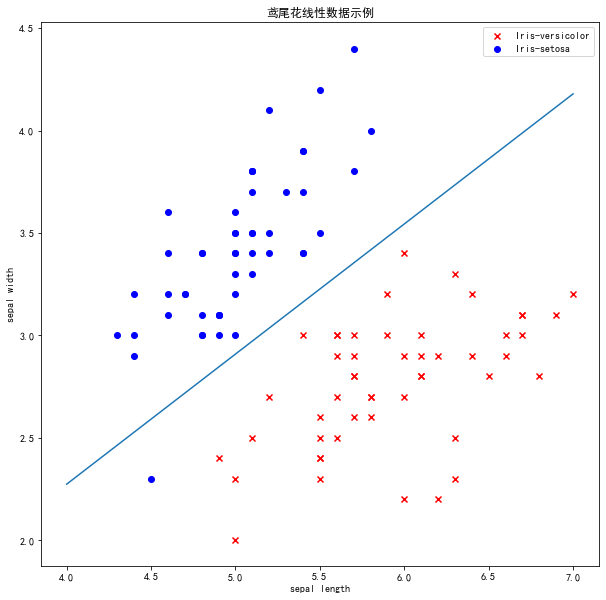

In [28]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

# 数据散点图
plt.scatter(iris_versicolor['SepalLengthCm'], iris_versicolor['SepalWidthCm'], c='r', label='Iris-versicolor', marker='x')
plt.scatter(iris_setosa['SepalLengthCm'], iris_setosa['SepalWidthCm'], c='b', label='Iris-setosa',)

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()  # 显示图片

### 注意

需要说明的是，上图中，有一个蓝点在代表感知机模型的超平面下方，但是我们之前的感知机在测试集上输出的准确率是 100%，这是怎么回事？

原来，这个蓝点是训练集的一个点，而我们的 100% 准确率是针对的测试集而言的，所以有这么一个例外情况。

要修正这种情况，需要修改感知机中的 `tol` 参数:

>**tol : float or None, optional (default=1e-3)**
>
>The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

`tol` 参数的本意是当loss和前一次迭代的loss之差小于一个极小值（默认是0.001）时，停止迭代，这个蓝点的迭代损失就符合这个条件，故蓝点没有被正确分类。我们将其改为 `tol=None` 之后试试:

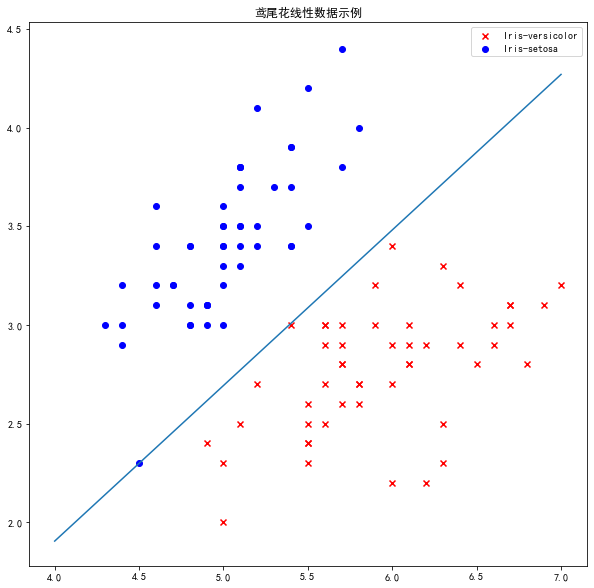

In [33]:
#重新定义感知机
clf = Perceptron(random_state=None, 
                 fit_intercept=True,
                 max_iter=2000, # 训练次数
                 tol=None,
                 shuffle=True)
#使用训练数据进行训练
clf.fit(X_train, y_train)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

# 数据散点图
plt.scatter(iris_versicolor['SepalLengthCm'], iris_versicolor['SepalWidthCm'], c='r', label='Iris-versicolor', marker='x')
plt.scatter(iris_setosa['SepalLengthCm'], iris_setosa['SepalWidthCm'], c='b', label='Iris-setosa',)

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.show()  # 显示图片

可以看出蓝点已经被正确分类了。